<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/2022_10_14_%EA%B3%BC%EC%A0%9C_%EB%91%90%EC%9E%87_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EC%9E%85%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

두잇 판다스 입문

>datetime 오브젝트로 변환하기 - to_datetime 메서드

시계열을 문자열로 저장해야할 때, 문자열은 시간 계산은 불가능하므로 datetime 오브젝트로 변경 필요.

In [28]:
#문자열을 datetime 오브젝트로 변환하기

#01. 먼저 ebola 데이터 집합 불러온다
import pandas as pd
import os

ebola=pd.read_csv('country_timeseries.csv')

In [6]:
#02. ebola 데이터 프레임을 보면 문자열로 저장된 date 열이 있다
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [7]:
#03. to_datetime 메서드를 사용하면 date 열의 자료형을 datetime 오브젝트로 변환 가능. 새로운 열로 추가하자.
ebola['date_dt']=pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [8]:
#04. 더 자세히 보자. 시간 형식 지정자와 기호를 조합하여 format 인자에 전달하면 그 형식에 맞는 datetime 오브젝트를 얻을 수 있다.
test_df1=pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1']=pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2']=pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3']=pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

test_df2=pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt']=pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15
  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


>시간 형식 지정자

%a 요일 이름 / %A 긴 요일 이름 / %w 0부터 일요일인 요일 숫자
<br/>%b 월 / %B 긴 월 이름
<br/>%H 24시간 / %I 12시간 / %p am, pm
<br/>%c 날짜와 시간 / %x 날짜 / %X 시간 / %G 년도 / %u 요일

In [9]:
from datetime import datetime

In [10]:
#시계열 데이터 구분해서 추출
now=datetime.now()
print(now)

2022-10-11 05:26:21.148499


In [11]:
nowDate=now.strftime('%Y-%m-%d')
print(nowDate)

2022-10-11


In [12]:
nowTime=now.strftime('%H:%M:%S')
print(nowTime)

05:26:21


In [13]:
nowDatetime=now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2022-10-11 05:26:21


>datetime 오브젝트로 변환하기 - read_csv 메서드

In [14]:
#datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

#01. parse_dates 인자에 전달
ebola1=pd.read_csv('country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

>datetime 오브젝트에서 날짜 정보 추출하기

In [15]:
#01. 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환한 것
date_series=pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1=pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [16]:
#02. datetime 오브젝트의 속성을 이용하면 바로 추출 가능
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


>dt 접근자 사용하기

문자열을 처리하려면 str 접근자를 사용한 다음 문자열 속성이나 메서드를 사용했어야함. datetime 오브젝트도 마찬가지로 dt 접근자를 사용하면 datetime 속성이나 메서드 사용 가능.

In [17]:
#dt 접근자로 시계열 데이터 정리하기

#01. ebola 불러와 Date 열을 datetime 오브젝트로 변환하여 새로 추가.
ebola=pd.read_csv('country_timeseries.csv')
ebola['date_dt']=pd.to_datetime(ebola['Date'])

In [18]:
#02. dt 이용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터 추출
print(ebola[['Date', 'date_dt']].head())

print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


In [19]:
#03. 위는 불편. dt 접근자로 date_dt 열에 한번에 접근하여 속성을 이용해 추출하고 새로운 열에 추가.
ebola['year']=ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [20]:
#04. 위를 응용해 월, 일 데이터를 새로 추가
ebola['month'], ebola['day']=(ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [21]:
#05. ebola 데이터 프레임에 새로 추가한 열들의 자료형을 출력해보면 date_dt는 datetime 오브젝트고 나머지는 정수형이다.
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

##12-2 사례별 시계열 데이터 계산하기

>에볼라 최초 발병일 계산하기

In [22]:
#01. ebola 마지막 살펴보자. 시간이 역순.
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [23]:
#02. 에볼라 시작일 2014년 3월 22일. min 메서드로 찾자.
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [24]:
#03. Date 열에서 최초 발병일 빼면 에볼라의 진행 정도를 알 수 있다.
ebola['outbreak_d']=ebola['date_dt']-ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


>파산한 은행의 개수 확인하기

In [25]:
#01. 파산 은행 불러오고 살펴보자. closing date, updated date 열의 자료형이 시계열이다.
banks=pd.read_csv('banklist.csv')
print(banks.head())

FileNotFoundError: ignored

In [ ]:
#02. closing date, updated date 열의 데이터 자료형이 문자열. parse_dates 이용해 datetime으로 변환해 불러오자.
banks_no_dates=pd.read_csv('banklist.csv')
print(banks_no_dates.info())

banks=pd.read_csv('banklist.csv', parse_dates=[5,6])
print(banks.info())

In [ ]:
#03.dt 접근자, quarter 속성 이용하면 은행이 파산한 분기를 알 수 있다. 새로 추가하자.
banks['closing_quarter'], banks['closing_year']=(banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

In [ ]:
#04. 연도별로 파산한 은행이 얼마나 되는지 보자.
closing_year=banks.groupby(['closing_year']).size()
print(closing_year)

In [ ]:
#05. 연도별, 분기별로 파산한 은행의 개수도 보자.
closing_year_q=banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

In [ ]:
#06. 그래프도 그리자
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax=closing_year.plot()
plt.show()

fig, ax=plt.subplots()
ax=closing_year_q.plot()
plt.show()

>시간 범위 수정하고 데이터 밀어내기 - shift 메서드

나라별로 에볼라의 확산 속도를 비교하려면 시작한 날짜를 옮기는 것이 좋다. 이유를 알아보자.

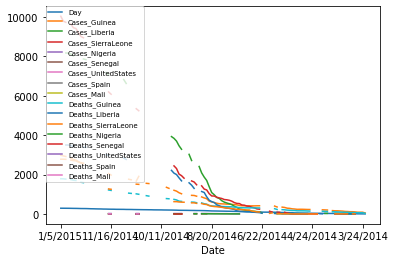

In [29]:
#에볼라의 확산 속도 비교하기

#01. x축을 date 열로, y축을 사망자 수로 지정하여 그래프 그리자
import matplotlib.pyplot as plt

ebola.index=ebola['Date']

fig, ax=plt.subplots()
ax=ebola.iloc[0:,1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [30]:
#02. 위는 에볼라 발병일이 달라 나라마다 그래프가 그려지기 시작한 지점도 다름. 각 나라의 발병일을 가장 처음 발병한 Guinea와 동일한 위치로 옮겨야 확산 속도 비교 가능.
ebola_sub=ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))


           Day  Cases_Guinea  Cases_Liberia
Date                                       
4/4/2014    13         143.0           18.0
4/1/2014    10         127.0            8.0
3/31/2014    9         122.0            8.0
3/29/2014    7         112.0            7.0
3/28/2014    6         112.0            3.0
3/27/2014    5         103.0            8.0
3/26/2014    4          86.0            NaN
3/25/2014    3          86.0            NaN
3/24/2014    2          86.0            NaN
3/22/2014    0          49.0            NaN


In [33]:
#03. 그래프 그리기 위한 데이터 프레임 준비하기. Date 열의 자료형을 datetime으로 변환해 다시 생성하자. 중간 날짜가 없는 데이터도 포함시켜야 확산 속도 비교 가능.
ebola=pd.read_csv('country_timeseries.csv', parse_dates=['Date'])
print(ebola.head().iloc[:, :5])
print(ebola.tail().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [34]:
#04. Date열을 인덱스로 지정하고 ebola 데이터프레임의 Date 열의 최댓값과 최솟값으로 시간 범위를 생성해 new_idx에 저장. 날짜가 없는 데이터의 인덱스를 생성할 수 있다.
ebola.index=ebola['Date']
new_idx=pd.date_range(ebola.index.min(), ebola.index.max())


In [35]:
#05. new_idx를 보면 ebola 데이터 집합의 있는 시간 순서와 반대임. 시간 순서를 맞추기 위해 reversed 메서드 사용해 인덱스 뒤집자.
print(new_idx)
new_idx=reversed(new_idx)
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [36]:
#06. reindex 메서드로 새로 생성한 인덱스를 새로운 인덱스로 지정하자.
ebola=ebola.reindex(new_idx)
print(ebola.head().iloc[:,:5])
print(ebola.tail().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN
                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 

In [37]:
#07. 각 나라의 에볼라 발병일 옮기기. last_valid_index, first_valid_index 메서드 사용해 각 나라의 발병일 구하자. 
last_valid=ebola.apply(pd.Series.last_valid_index)
print(last_valid)

first_valid=ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]
Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia       

In [38]:
#08. 각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면 에볼라가 처음 발병한 날(earliest_date)에서 각 나라의 에볼라 발병일을 뺀 만큼(shift_values) 옮기면 된다.
earliest_date=ebola.index.min()
print(earliest_date)

shift_values=last_valid-earliest_date
print(shift_values)

2014-03-22 00:00:00
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [39]:
#09. 각 나라의 발병일을 옮기자. shift 메서드를 사용해 모든 열의 값을 shift_values 만큼 옮긴 것. shift 메서드는 인잣값만큼 데이터를 밀어낸다.
ebola_dict={}
for idx, col in enumerate(ebola):
  d=shift_values[idx].days
  shifted=ebola[col].shift(d)
  ebola_dict[col]=shifted


In [40]:
#10. ebola_dict에는 시간을 다시 설정한 딕셔너리 형태 데이터가 저장. DateFrame 메서드로 변환하자.
ebola_shift=pd.DataFrame(ebola_dict)

In [41]:
#11. 옮겨졌다.
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [42]:
#12. 인덱스를 day 열로 지정하고 그래프에 필요없는 열은 삭제하면 그래프를 위한 데이터프레임 완성
ebola_shift.index=ebola_shift['Day']
ebola_shift=ebola_shift.drop(['Date', 'Day'], axis=1)
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

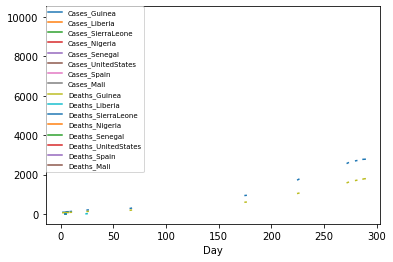

In [43]:
#13. 그래프 그리자
fig, ax=plt.subplots()
ax=ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()